# Image Classification using Convolutional Neural Networks
Published in _**International Journal of Pure and Applied Mathematics**_

Paper Implementation Submitted by -
- Sidhartha Mallick ( B118055 )
- Preeti Dey ( B118040 )

As a real life application of Classification Analysis being taught in the course _Data Mining_ as in 6th Semester.

Guided By - 
_Dr. Swati Vipsita_
- PhD (Computer Science and Engineering), NIT Rourkela, India
- MTech (Computer Science and Engineering), NIT Rourkela, India

#### Paper Implementation

1. Load the data
2. Data pre-processing
3. Define CNN Layers and activation functions
4. Create a model
5. Train the model i.e. reduce the cost of the cost function
6. Test the trained model with the test data.
7. Check the statistics for model efficiency. 

In [ ]:
# import the packages, which we will use all throughout the code
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
data = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [ ]:
def process_data(data):
    print("pre-processing data")
    X = np.array(data[0][0])
    X = X/255.0
    X = X.reshape((-1,28,28,1))
    y = np.array(data[0][1])
    y = to_categorical(y, num_classes = 10)
    return train_test_split(X,y, test_size = 0.2, train_size = 0.8 ,random_state = 10)

In [ ]:
X_train, X_test, y_train, y_test = process_data(data)

pre-processing data


In [ ]:
# defining the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, validation_split=0.2, epochs=25)

Epoch 1/25
300/300 [==============================] - 3s 10ms/step - loss: 0.4512 - accuracy: 0.8684 - val_loss: 0.0678 - val_accuracy: 0.9796
Epoch 2/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0534 - accuracy: 0.9832 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 3/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0554 - val_accuracy: 0.9839
Epoch 4/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0504 - val_accuracy: 0.9846
Epoch 5/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 6/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0608 - val_accuracy: 0.9847
Epoch 7/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.0782 - val_accuracy: 0.9824
Epoch

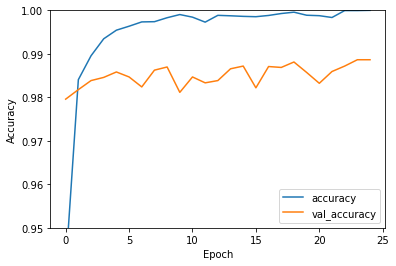

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')

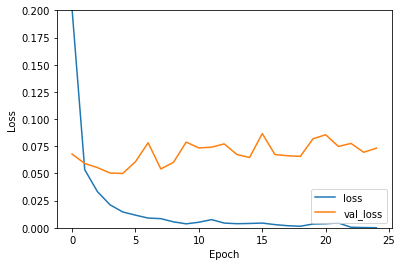

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='lower right')

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
def getMax(arr):
    maxx = 0
    index = 0
    for i in range(10):
        if( arr[i] > maxx):
            index = i
            maxx = arr[i]
    return index

In [ ]:
Y_p = []
Y_t = []
for y_p,y_t in zip(Y_pred,y_test):
    Y_p.append(getMax(y_p))
    Y_t.append(getMax(y_t))
    


In [ ]:
print(Y_p)
print(Y_t)

[3, 5, 0, 6, 6, 9, 1, 1, 5, 6, 2, 0, 1, 4, 7, 6, 2, 5, 5, 0, 3, 7, 7, 2, 4, 1, 5, 1, 4, 8, 9, 2, 2, 6, 7, 9, 7, 1, 9, 1, 7, 1, 5, 5, 5, 3, 8, 5, 7, 5, 7, 3, 9, 7, 6, 7, 3, 1, 7, 4, 2, 0, 0, 2, 7, 1, 4, 1, 2, 3, 7, 3, 3, 2, 4, 4, 3, 7, 2, 8, 8, 3, 1, 0, 4, 2, 1, 0, 1, 9, 6, 7, 1, 9, 6, 5, 4, 7, 4, 7, 0, 2, 7, 6, 9, 7, 3, 9, 7, 2, 0, 7, 5, 9, 1, 7, 8, 8, 2, 5, 0, 3, 2, 9, 0, 4, 7, 2, 2, 2, 6, 0, 5, 7, 7, 0, 8, 9, 0, 7, 0, 7, 6, 1, 1, 4, 7, 2, 2, 2, 1, 1, 7, 3, 7, 5, 3, 8, 4, 0, 5, 9, 7, 0, 5, 4, 8, 8, 8, 7, 4, 5, 5, 5, 0, 6, 0, 6, 8, 7, 3, 5, 4, 6, 7, 0, 3, 3, 1, 1, 8, 0, 7, 8, 3, 1, 0, 3, 8, 7, 3, 2, 1, 6, 9, 5, 9, 2, 7, 2, 6, 2, 8, 7, 9, 0, 0, 0, 0, 6, 3, 0, 9, 2, 9, 7, 1, 6, 0, 1, 5, 9, 2, 6, 3, 4, 9, 8, 3, 9, 2, 1, 7, 4, 7, 4, 5, 1, 3, 4, 2, 1, 3, 0, 9, 5, 8, 1, 0, 4, 7, 6, 4, 0, 7, 5, 8, 3, 0, 2, 7, 3, 4, 5, 6, 1, 6, 2, 4, 7, 3, 9, 7, 2, 9, 8, 5, 6, 7, 5, 1, 3, 6, 5, 0, 7, 1, 3, 2, 7, 3, 9, 2, 1, 0, 1, 1, 5, 5, 0, 6, 9, 6, 2, 4, 3, 7, 6, 9, 3, 7, 4, 1, 6, 6, 0, 1, 0, 1, 4, 1, 5, 3, 

In [ ]:
# from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

In [ ]:
acc = model.evaluate(X_test, y_test)
f1 = f1_score(Y_t, Y_p, average='micro')

print("Loss.    : " + str(acc[0]))
print('f1 score : ' + str(f1))
print('Accuracy : ' + str(acc[1]))


375/375 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9896
Loss.    : 0.06386541575193405
f1 score : 0.97425
Accuracy : 0.9895833134651184


In [ ]:
print(classification_report(Y_t, Y_p))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1127
           1       1.00      0.99      1.00      1345
           2       0.92      0.99      0.95      1241
           3       0.98      0.99      0.98      1182
           4       0.94      0.98      0.96      1200
           5       0.98      0.97      0.98      1104
           6       0.98      0.95      0.97      1201
           7       0.99      0.96      0.98      1336
           8       0.98      0.95      0.96      1154
           9       0.99      0.96      0.98      1110

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [ ]:
c_mat = confusion_matrix(Y_t, Y_p)


In [ ]:
c_mat

array([[1125,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1337,    6,    0,    0,    0,    1,    0,    0,    1],
       [   1,    3, 1230,    1,    0,    0,    1,    3,    2,    0],
       [   0,    0,   14, 1165,    0,    2,    0,    0,    0,    1],
       [   0,    1,   23,    0, 1171,    0,    1,    1,    1,    2],
       [   1,    0,    2,   15,    1, 1076,    5,    0,    4,    0],
       [  11,    0,    0,    0,   47,    1, 1142,    0,    0,    0],
       [   0,    0,   30,    4,   12,    2,    0, 1282,    2,    4],
       [   2,    0,   33,    4,    4,    4,   10,    1, 1092,    4],
       [   0,    0,    0,    1,   13,    8,    0,    3,   14, 1071]])

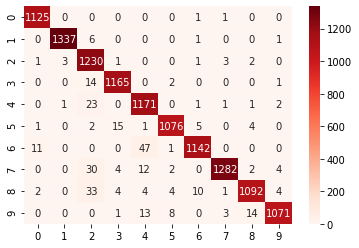

In [ ]:
ax = sns.heatmap(c_mat, cmap="Reds", annot=True, fmt='.0f')

In [ ]:
from tensorflow.keras import models

In [ ]:
image_index = 101

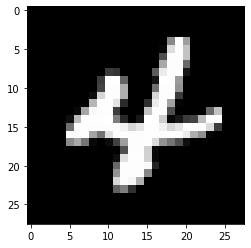

In [ ]:
plt.imshow(X_test[image_index, :, :, 0], cmap="gray")

In [ ]:
# fig = plt.figure()
layer_outputs = [layer.output for layer in model.layers[:3]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_test) 
first_layer_activation = activations[0]
n_col = 12
n_row = 3
_, axs = plt.subplots(n_row, n_col, figsize=(112, 28))
axs = axs.flatten()

for i in range(32):
    # ax1 = fig.add_subplot(6,6,i%4+1)
    axs[i].imshow(first_layer_activation[image_index, :, :, i], cmap='gray')

plt.show()

ResourceExhaustedError: ignored

In [ ]:
# fig = plt.figure()
# layer_outputs = [layer.output for layer in model.layers[:3]] 
# activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# activations = activation_model.predict(X_test) 
second_layer_activation = activations[1]
n_col = 11
n_row = 6
_, axs = plt.subplots(n_row, n_col, figsize=(110, 60))
axs = axs.flatten()

for i in range(64):
    # ax1 = fig.add_subplot(6,6,i%4+1)
    axs[i].imshow(second_layer_activation[image_index, :, :, i], cmap='gray')

plt.show()

In [ ]:
# fig = plt.figure()
# layer_outputs = [layer.output for layer in model.layers[:4]] 
# activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# activations = activation_model.predict(X_test) 
third_layer_activation = activations[2]
n_col = 18
n_row = 4
_, axs = plt.subplots(n_row, n_col, figsize=(84, 24))
axs = axs.flatten()

for i in range(64):
    # ax1 = fig.add_subplot(6,6,i%4+1)
    axs[i].imshow(third_layer_activation[image_index, :, :, i], cmap='gray')

plt.show()